In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import json

from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#### reading in data with song info and audio features via pickle

In [136]:
italy_17_19 = pd.read_pickle('../data/it_17_19_feat.pkl')
italy_17_19.head()

,Position,Track Name,Artist,Streams,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,,
2017-01-06,1,Shape of You,Ed Sheeran,1051142,it,7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713,4
2017-01-06,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,759626,it,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.1800,0.742,101.965,251088,4
2017-01-06,3,Castle on the Hill,Ed Sheeran,715171,it,6PCUP3dWmTjcTtXY02oFdT,0.461,0.834,2,-4.868,1,0.0989,0.0232,0.000011,0.1400,0.471,135.007,261154,4
2017-01-06,4,Closer,The Chainsmokers,504232,it,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.1110,0.661,95.010,244960,4
2017-01-06,5,Assenzio (feat. Stash & Levante),J-AX,478975,it,0DRKnh0BloxJHyhXkfbiX8,0.554,0.640,0,-7.587,1,0.1870,0.3410,0.000000,0.1080,0.641,160.009,250533,4


In [137]:
type(italy_17_19.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [138]:
spain_17_19 = pd.read_pickle('../data/sp_17_19_feat.pkl')
spain_17_19.head(2)

,Position,Track Name,Artist,Streams,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,,
2017-01-06,1,Chantaje (feat. Maluma),Shakira,1423583,es,6mICuAdrwEjh6Y6lroV2Kg,0.852,0.773,8,-2.921,0,0.0776,0.187,0.00003,0.159,0.907,102.034,195840,4
2017-01-06,2,Reggaetón Lento (Bailemos),CNCO,1339834,es,3AEZUABDXNtecAOSC1qTfo,0.761,0.838,4,-3.073,0,0.0502,0.400,0.00000,0.176,0.710,93.974,222560,4


In [139]:
greece_17_19 = pd.read_pickle('../data/gr_17_19_feat.pkl')
greece_17_19.head(2)

,Position,Track Name,Artist,Streams,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,,,,,
2017-01-06,1,Shape of You,Ed Sheeran,76164,gr,7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713,4
2017-01-06,2,Castle on the Hill,Ed Sheeran,37779,gr,6PCUP3dWmTjcTtXY02oFdT,0.461,0.834,2,-4.868,1,0.0989,0.0232,0.000011,0.1400,0.471,135.007,261154,4


In [67]:
italy_20 = pd.read_pickle('../data/it_20_feat.pkl')

In [68]:
spain_20 = pd.read_pickle('../data/sp_20_feat.pkl')
greece_20 = pd.read_pickle('../data/gr_20_feat.pkl')

#### Using resample to convert frequency of time series

**Resampling by month**

_`rm` denotes resampling by month._ 

In [140]:
rm_italy_17_19 = italy_17_19.resample("M").mean()

In [141]:
rm_italy_17_19 = italy_17_19.resample("M").mean()

In [142]:
rm_greece_17_19 = greece_17_19.resample("M").mean()

In [143]:
rm_italy_20 = italy_20.resample("M").mean()
rm_spain_20 = spain_20.resample("M").mean()
rm_greece_20 = greece_20.resample("M").mean()

In [144]:
rm_greece_17_19.head()

,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,
2017-01-31,100.5,7193.47875,0.643614,0.630956,5.20250,-6.674871,0.54875,0.109130,0.217906,0.027511,0.173735,0.455753,121.198466,223695.6375,3.99875
2017-02-28,100.5,7331.57875,0.644566,0.640034,5.36500,-6.318109,0.56625,0.107799,0.207795,0.018806,0.178180,0.457992,120.024129,225033.1975,4.00375
2017-03-31,100.5,7863.31400,0.660192,0.636054,5.38300,-6.258354,0.56900,0.115756,0.199541,0.012383,0.173420,0.463586,119.493961,221623.0640,3.98900
2017-04-30,100.5,7758.23000,0.672605,0.648561,4.98750,-6.151649,0.56500,0.118953,0.170326,0.014233,0.174701,0.471611,121.850534,222375.2525,3.97750
2017-05-31,100.5,8586.86375,0.674911,0.658356,5.06875,-5.940126,0.55625,0.108032,0.171582,0.011527,0.169889,0.488221,120.985329,218295.7500,3.97000


**Resampling by week**

_`rw` denotes resampling by week._ 

In [146]:
rw_italy_17_19 = italy_17_19.resample("W").mean()
rw_spain_17_19 = spain_17_19.resample("W").mean()
rw_greece_17_19 = greece_17_19.resample("W").mean()

In [147]:
rw_italy_20 = italy_20.resample("W").mean()
rw_spain_20 = spain_20.resample("W").mean()
rw_greece_20 = greece_20.resample("W").mean()

### EDA

In [7]:
# artists danceability scores (mean across all their songs)
italy_17_19.groupby('Artist')[['danceability']].mean().sort_values(by='danceability', ascending=False)[:10]

,danceability
Artist,
Samuel Heron,0.952769
VillaBanks,0.950000
Priestess,0.944000
Tredici Pietro,0.944000
Lil Pump,0.930273
BlocBoy JB,0.922000
Nuela,0.919000
Dj Kass,0.909500
Wolfine,0.909000


In [25]:
# for each artist, times in the top 200 from 2017-10
italy_17_19.groupby('Artist').count().sort_values(by='Position', ascending=False)[:10]

,Position,Track Name,Streams,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Artist,,,,,,,,,,,,,,,,,,
Capo Plaza,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864
Sfera Ebbasta,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864
Ultimo,773,773,773,773,773,773,773,773,773,773,773,773,773,773,773,773,773,773
Gemitaiz,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615
Guè Pequeno,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581
Coez,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561
Ghali,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539
Salmo,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
Ed Sheeran,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474


### Time Series Plotting 

Text(0.5, 1.0, 'Average Monthly Danceability Score for Songs on the Top 200 Weekliy Chart in Italy')

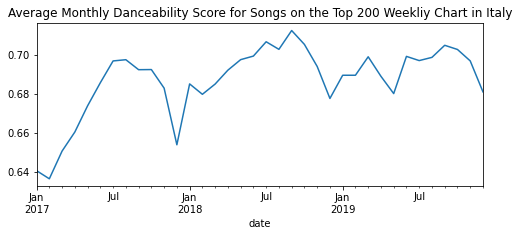

In [72]:
rm_italy_17_19['danceability'].plot(figsize=(8,3))
plt.title("Average Monthly Danceability Score for Songs on the Top 200 Weekliy Chart in Italy")

In [10]:
rm_italy_17_19.columns

Index(['Position', 'Streams', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [11]:
audio_features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']

#### Audio Features in Italy, Spain, Greece 2017 - 2019  - Basic Line Plots 

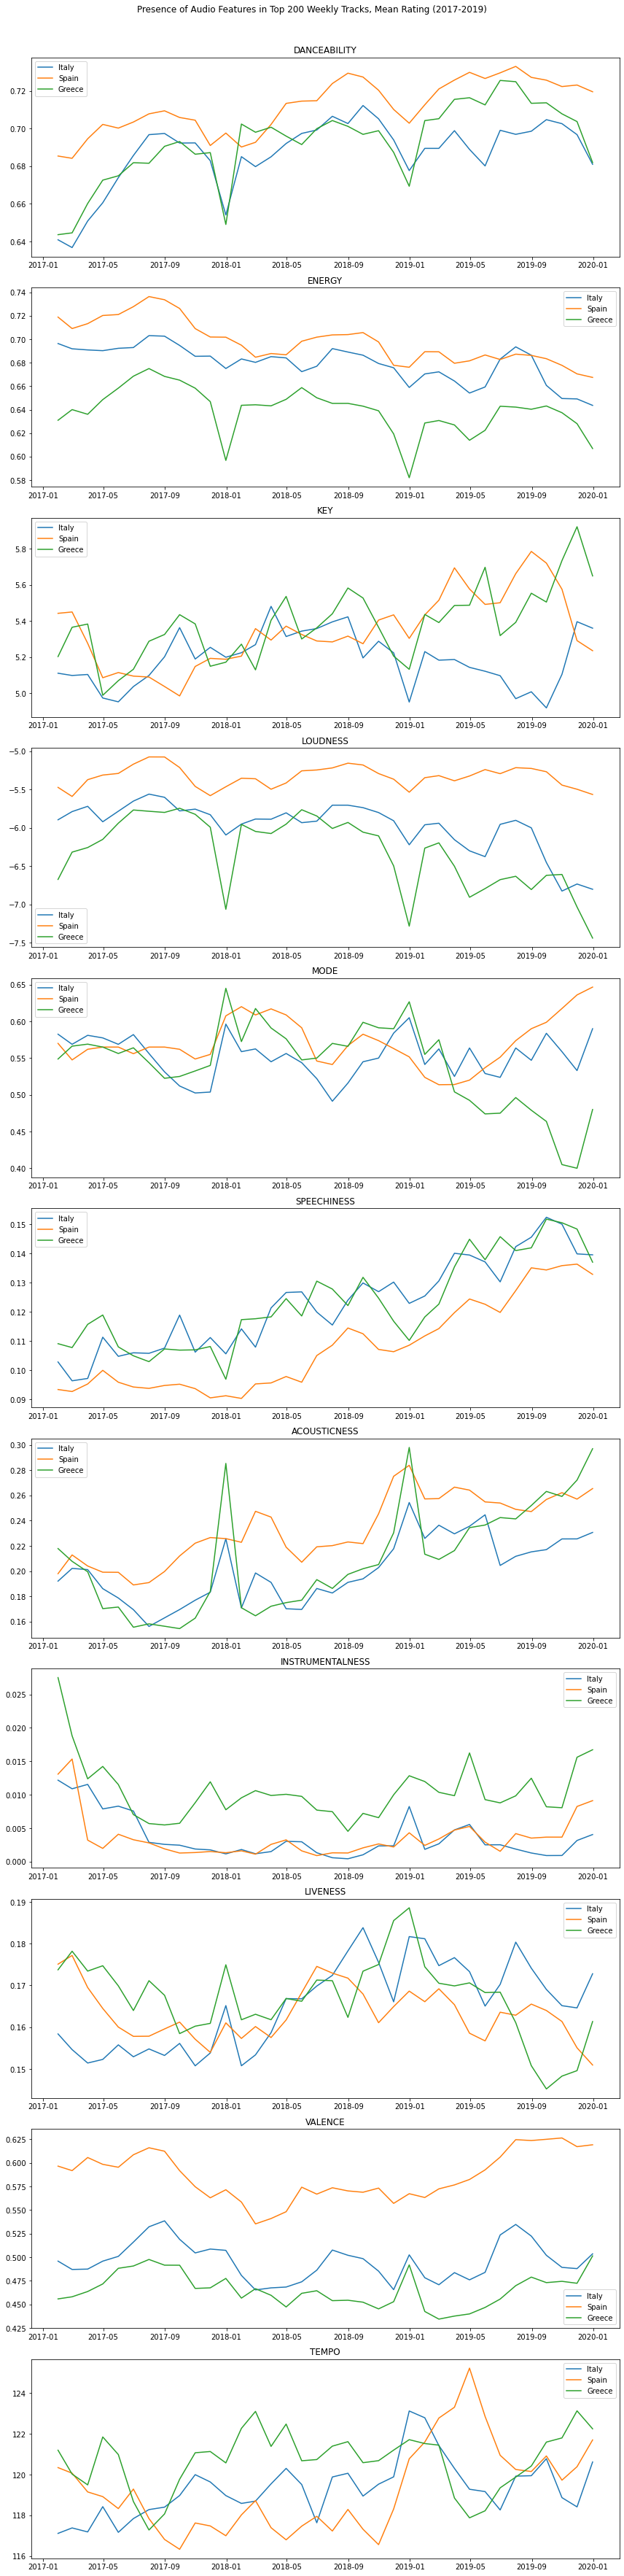

In [134]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(12,50))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(audio_features): 

    axs[i].plot(rm_italy_17_19[feature], label='Italy')
    axs[i].plot(rm_italy_17_19[feature], label='Spain')
    axs[i].plot(rm_greece_17_19[feature], label='Greece')
    axs[i].set_title(f'{feature.upper()}')
    axs[i].legend()
    
fig.tight_layout()
fig.subplots_adjust(top=.96)
fig.suptitle('Presence of Audio Features in Top 200 Weekly Tracks, Mean Rating (2017-2019)')
plt.show()

#### Audio Features in Italy, Spain, Greece 2020 - Basic Line Plots 

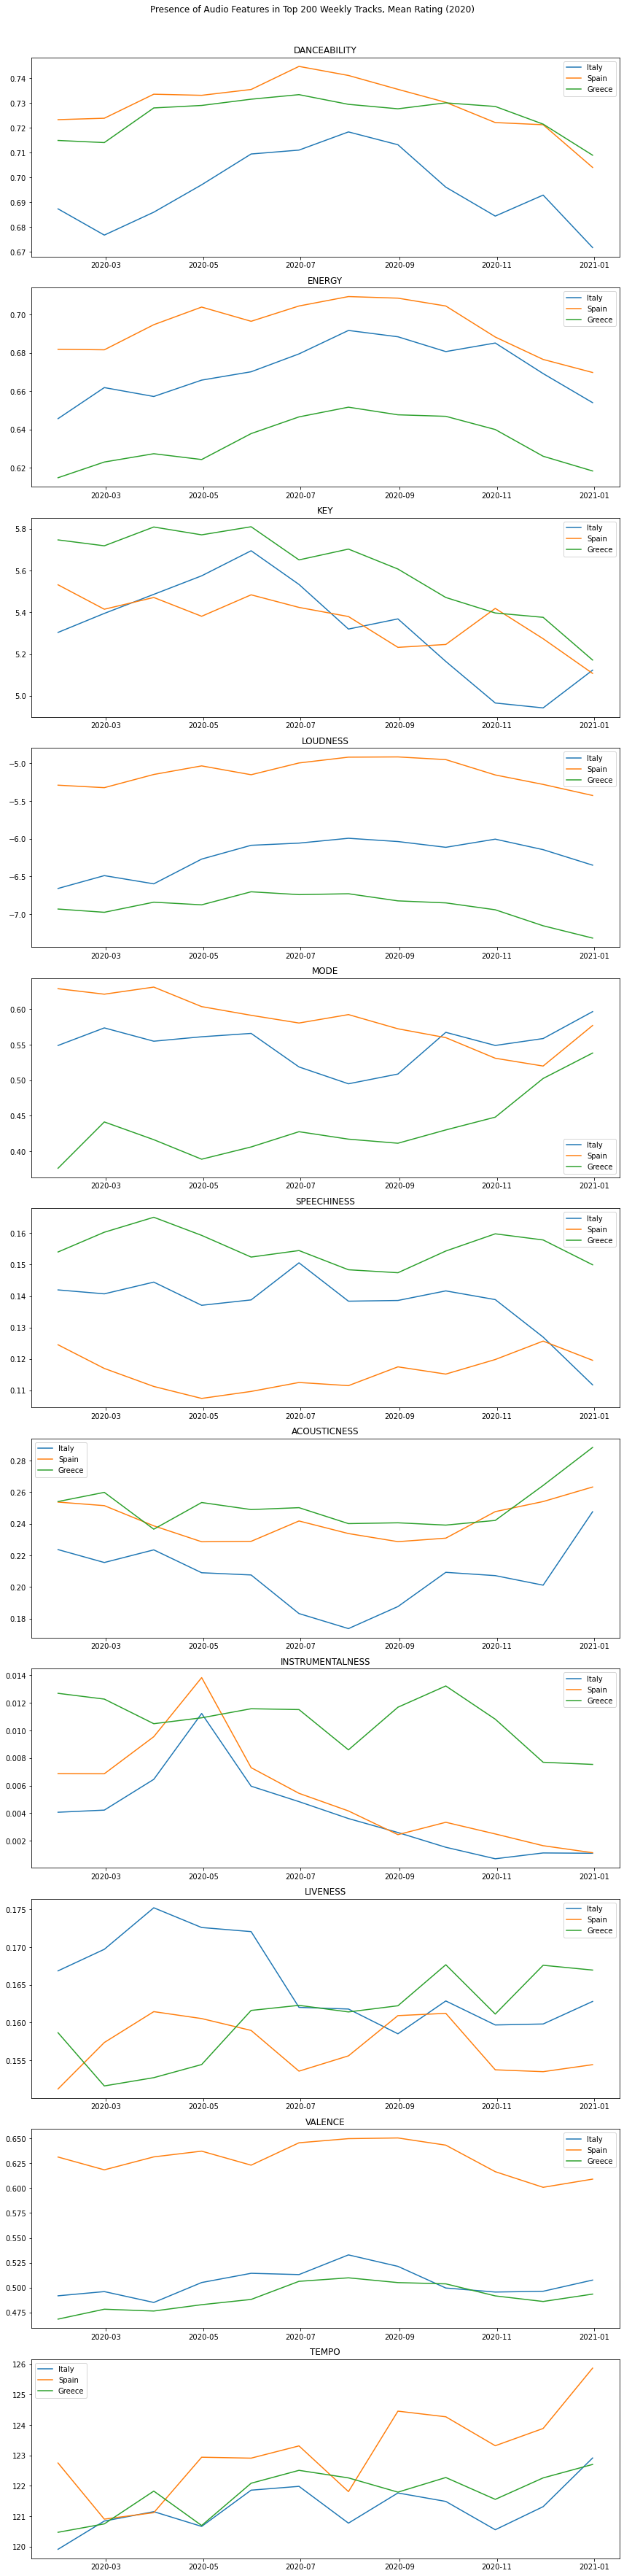

In [135]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(12,50))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(audio_features): 

    axs[i].plot(rm_italy_20[feature], label='Italy')
    axs[i].plot(rm_spain_20[feature], label='Spain')
    axs[i].plot(rm_greece_20[feature], label='Greece')
    axs[i].set_title(f'{feature.upper()}')
    axs[i].legend()
    
fig.tight_layout()
fig.subplots_adjust(top=.96)
fig.suptitle('Presence of Audio Features in Top 200 Weekly Tracks, Mean Rating (2020)')
plt.show()

#### Autocorrelation and Partial Autocorrelation Plots, 2017-19

_Using weekly resample for autocorrelation plots:_

AttributeError: 'numpy.ndarray' object has no attribute 'plot_acf'

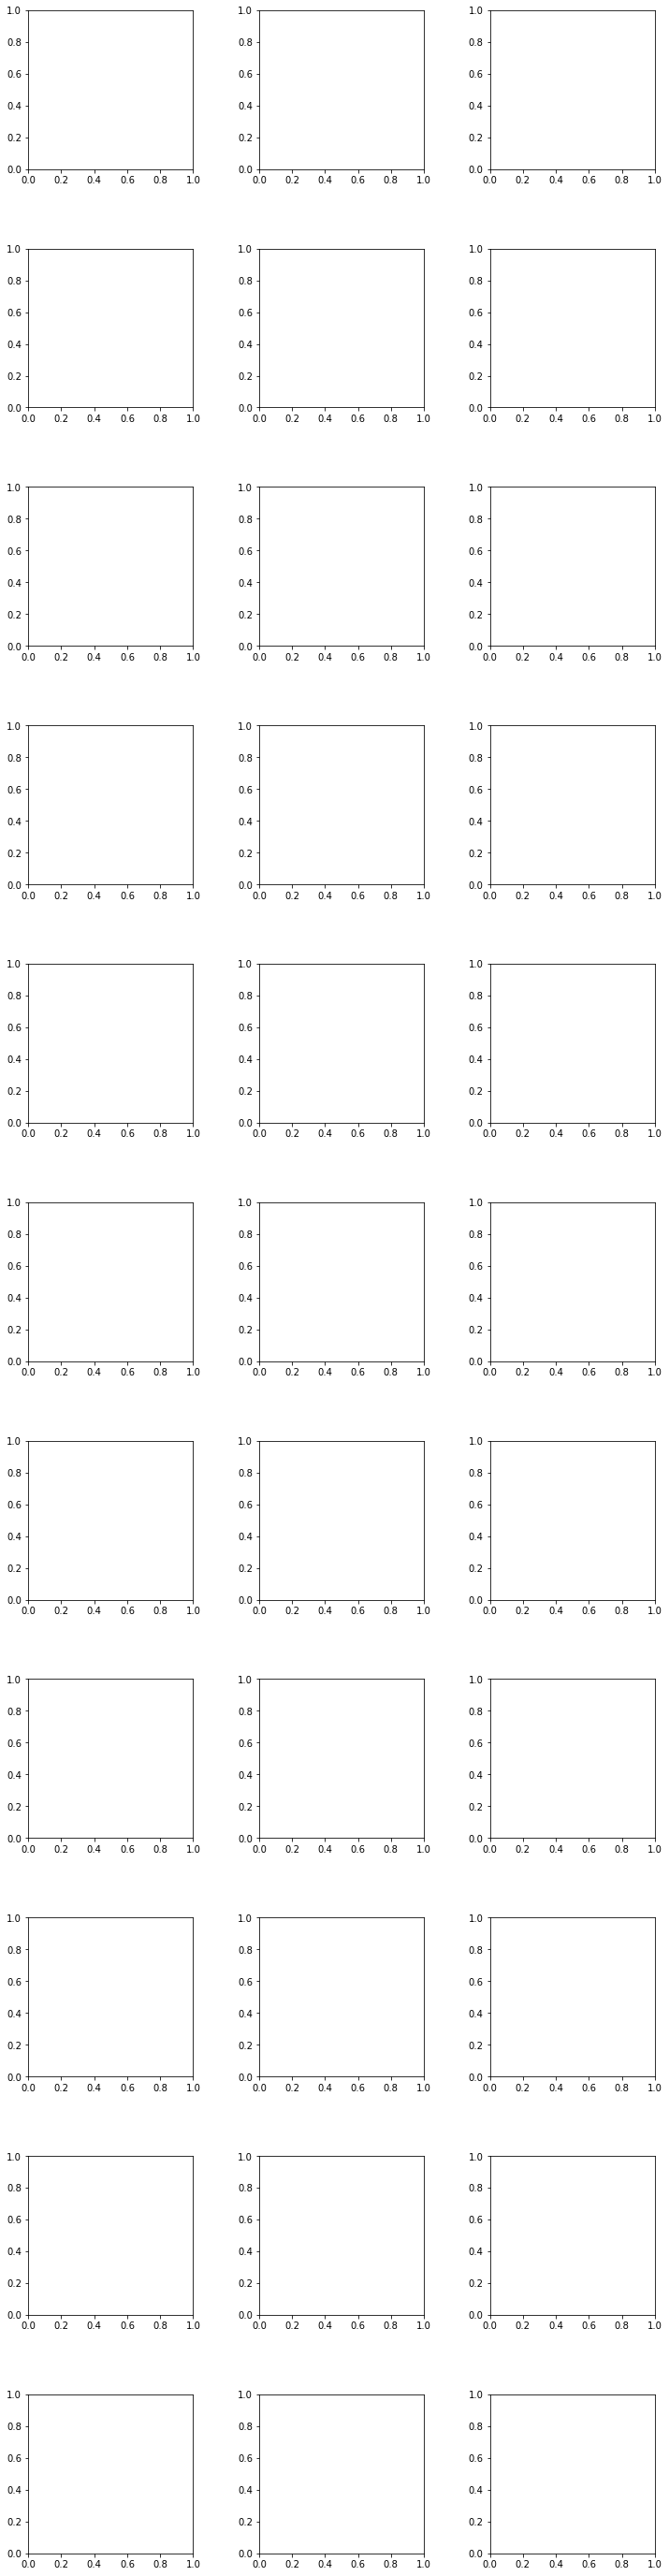

In [151]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(12,50))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(audio_features): 

    axs[i].plot_acf(rw_italy_17_19[feature].dropna(), lags=52, title=feature.capitalize())
    axs[i].plot_acf(rw_spain_17_19[feature].dropna(), lags=52, title=feature.capitalize())
    axs[i].plot_acf(rw_greece_17_19[feature].dropna(), lags=52, title=feature.capitalize())

#     axs[i].set_title(f'{feature.upper()}')
#     axs[i].legend()
    
# fig.tight_layout()
# fig.subplots_adjust(top=.96)
# fig.suptitle('Presence of Audio Features in Top 200 Weekly Tracks, Mean Rating (2020)')
plt.show()

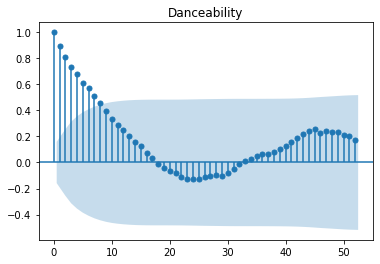

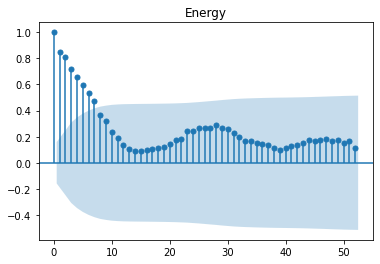

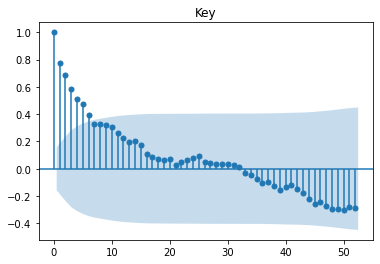

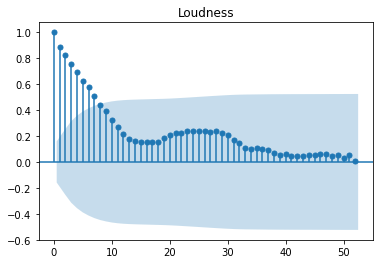

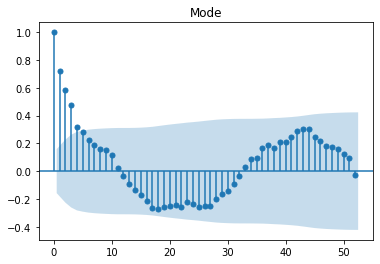

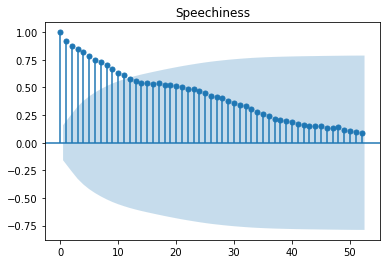

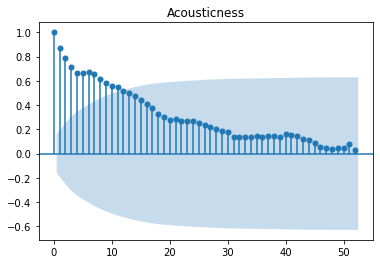

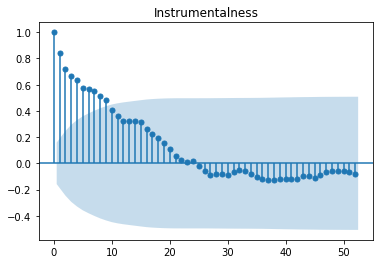

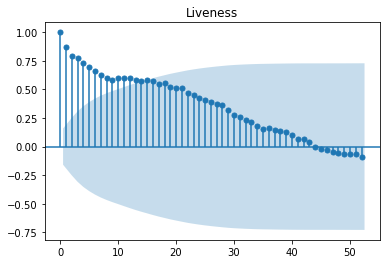

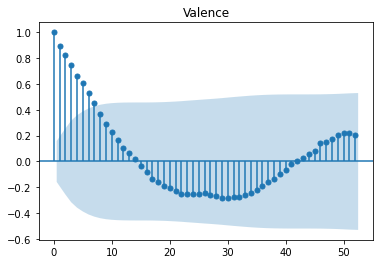

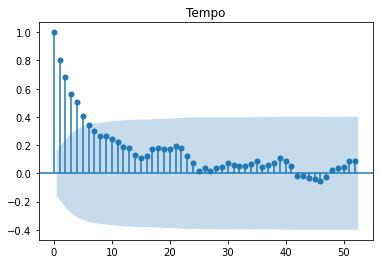

In [149]:
for feature in audio_features:
    
    plot_acf(rw_italy_17_19[feature].dropna(), lags=52, title=feature.capitalize())

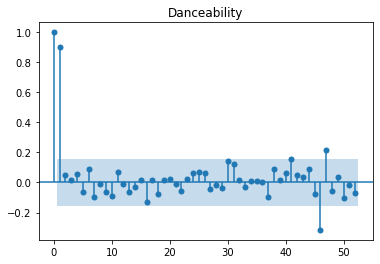

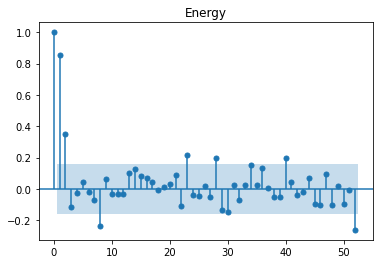

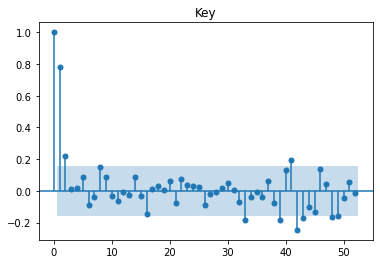

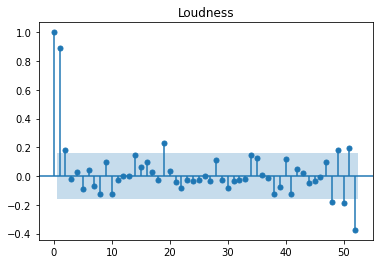

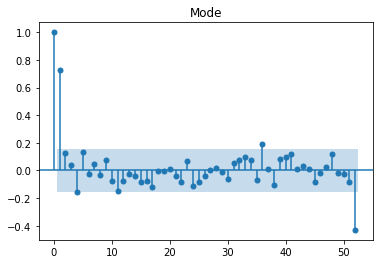

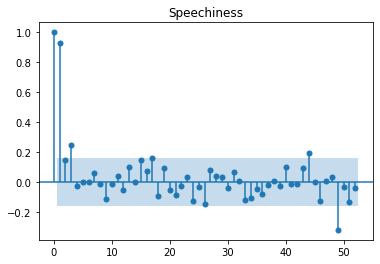

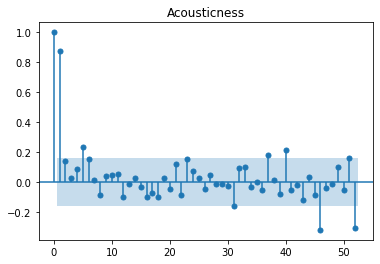

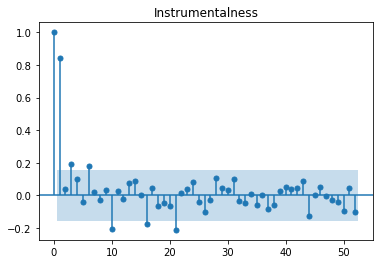

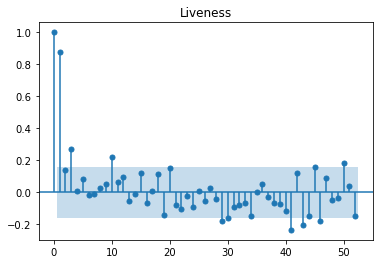

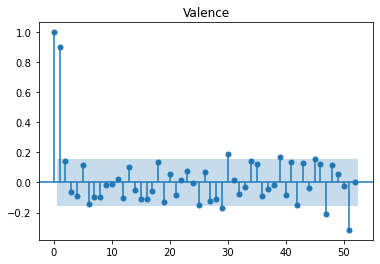

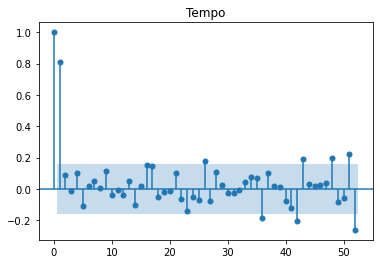

In [150]:
for feature in audio_features:
    
    plot_pacf(rw_italy_17_19[feature].dropna(), lags=52, title=feature.capitalize())

In [ ]:
for feature in audio_features:
    
    plot_acf(rw_italy_17_19[feature].dropna(), lags=52, title=feature.capitalize())

#### Autocorrelation and Partial Autocorrelation Plots, 2020

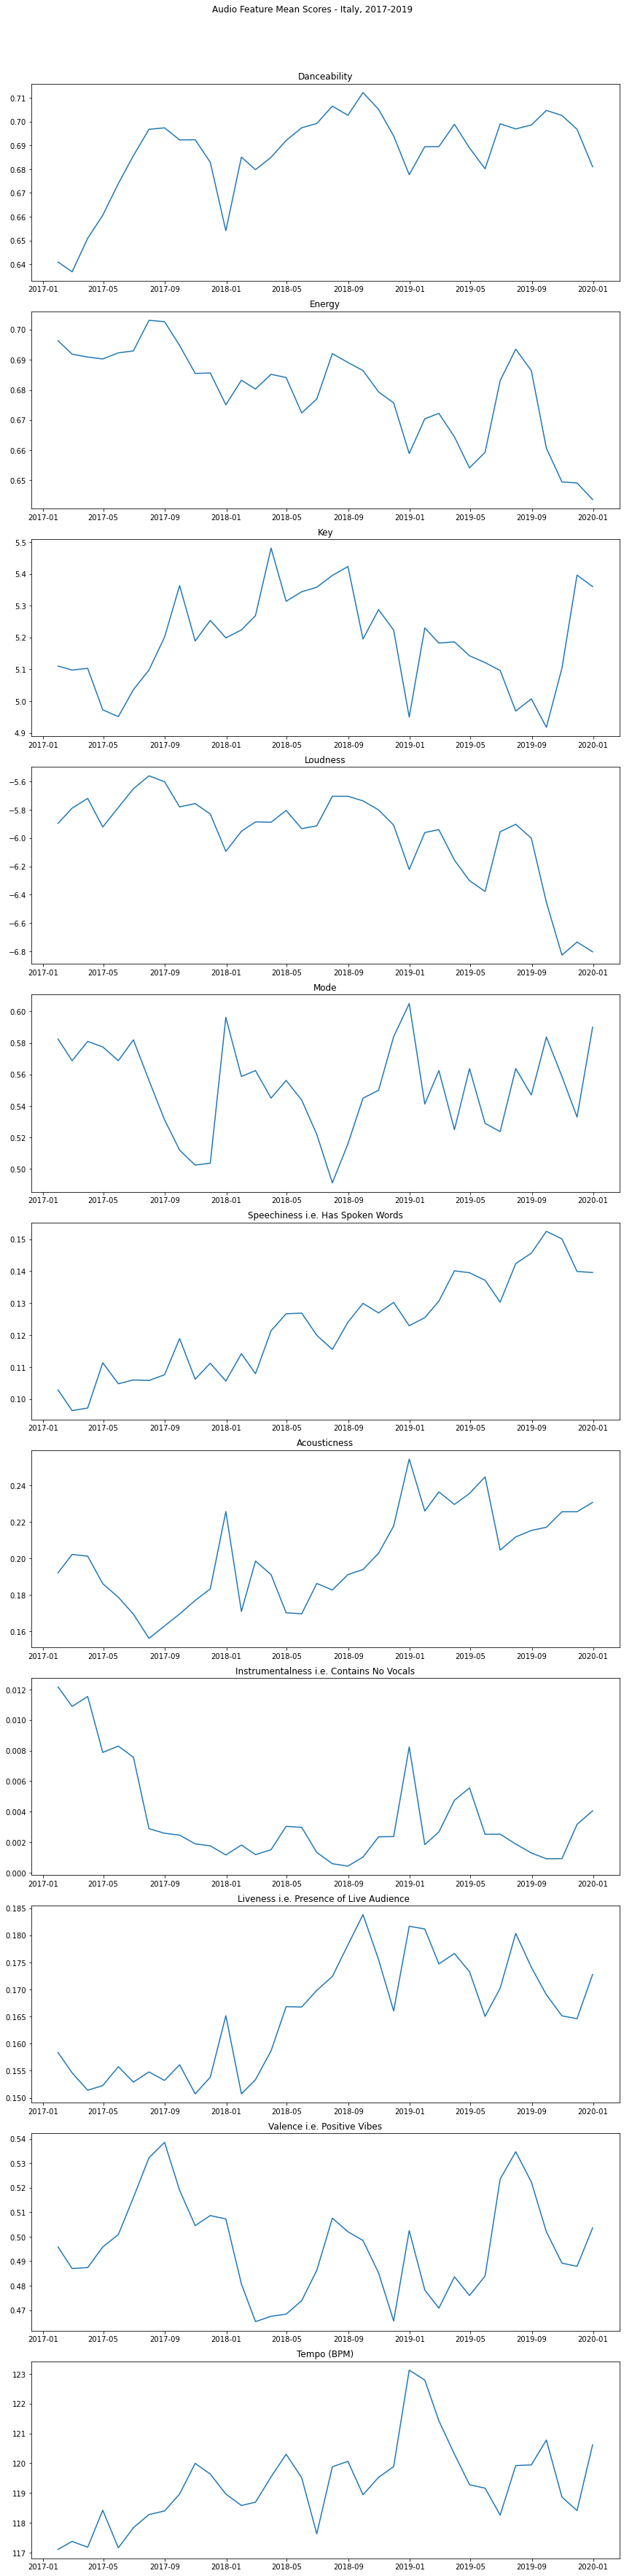

In [12]:
fig, axs= plt.subplots(11,1, figsize=(12, 50))

axs[0].plot(rm_italy_17_19['danceability'])
axs[0].set_title('Danceability')
axs[1].plot(rm_italy_17_19['energy'])
axs[1].set_title('Energy')
axs[2].plot(rm_italy_17_19['key'])
axs[2].set_title('Key')
axs[3].plot(rm_italy_17_19['loudness']) 
axs[3].set_title('Loudness')
axs[4].plot(rm_italy_17_19['mode'])
axs[4].set_title('Mode')
axs[5].plot(rm_italy_17_19['speechiness'])
axs[5].set_title('Speechiness i.e. Has Spoken Words')
axs[6].plot(rm_italy_17_19['acousticness'])
axs[6].set_title('Acousticness')
axs[7].plot(rm_italy_17_19['instrumentalness'])
axs[7].set_title('Instrumentalness i.e. Contains No Vocals')
axs[8].plot(rm_italy_17_19['liveness'])
axs[8].set_title('Liveness i.e. Presence of Live Audience ')
axs[9].plot(rm_italy_17_19['valence'])
axs[9].set_title('Valence i.e. Positive Vibes')
axs[10].plot(rm_italy_17_19['tempo'])
axs[10].set_title('Tempo (BPM)')


fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Audio Feature Mean Scores - Italy, 2017-2019')
plt.show()

From [linear-ts-modeling-lesson-notebook](10-week/10.02-linear-timeseries-modeling/linear-ts-modeling-starter-code.ipynb):

In [48]:
# Write function called plot_series that takes in 
# a dataframe, a list of column names to plot, the 
# plot title and the axis labels as arguments,
# then displays the line plot with a figure size
# of 18 horizontal inches by 9 vertical inches.

# Matthew Garton - BOS



def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, figsize=(18,9)):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=figsize)
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

In [49]:
audio_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [57]:
# plot_series(rm_italy_17_19, ['danceability'], title='Dancebility', figsize=(15,4))

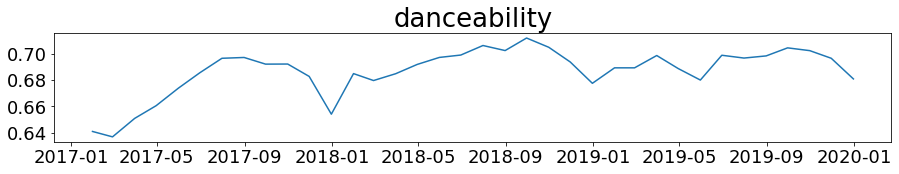

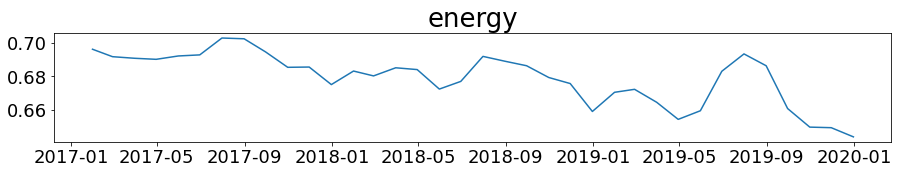

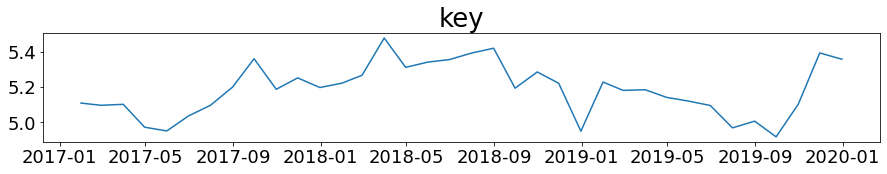

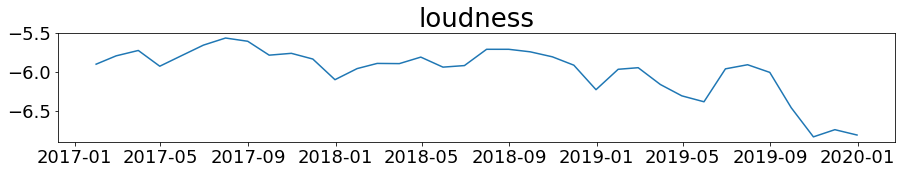

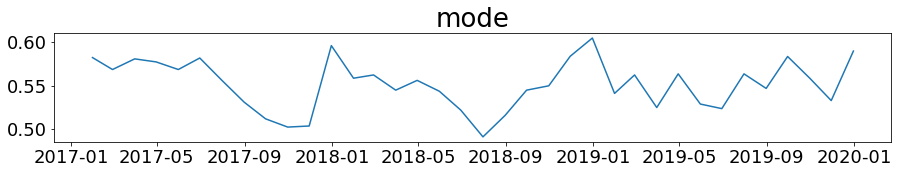

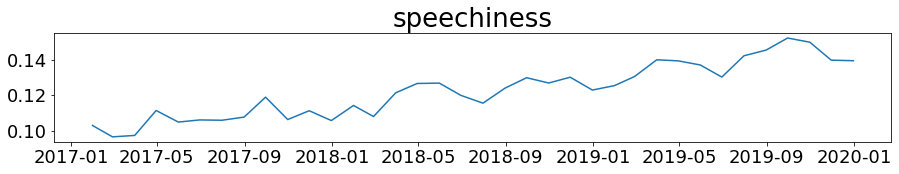

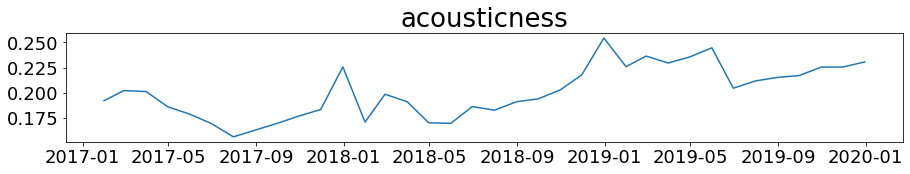

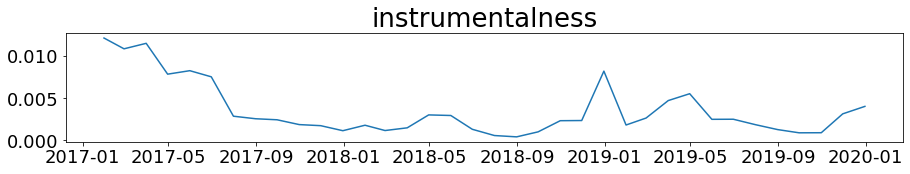

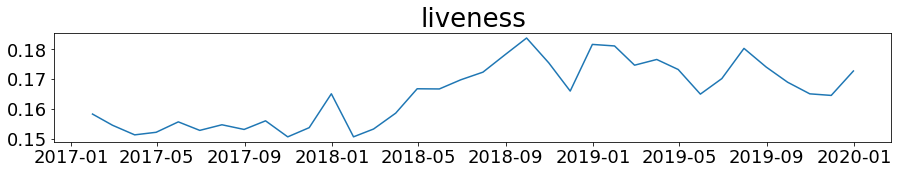

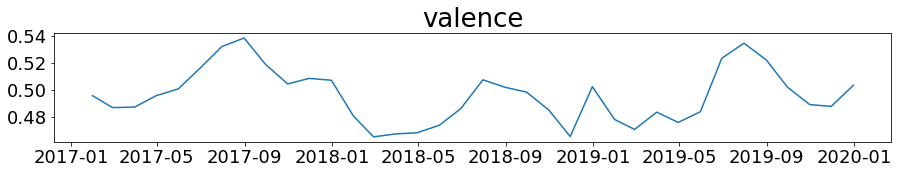

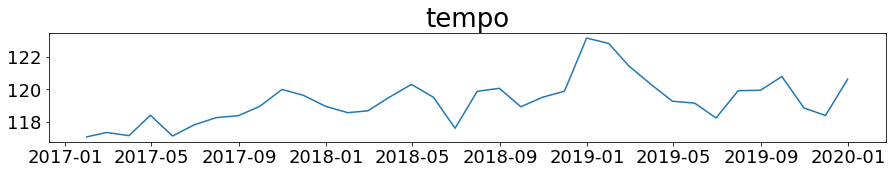

In [112]:
for col in audio_features:
    plot_series(rm_italy_17_19, [col], title=col, figsize=(15,2))

In [13]:
# rm_italy_17_19['danceability'].plot(figsize=(20,10))
# plt.title("Average Monthly Danceability Score for Songs on the Top 200 Weekliy Chart in Italy")

In [14]:
# fig, axs= plt.subplots(11,1, figsize=(15, 50))

# # for i, features in enumerate(audio_features):
# #     axs[i].plot(rm_italy_17_19[feature])

# # fig, axs= plt.subplots(11,1, figsize=(10,20))

# axs[0].plot(italy_17_19['danceability'])
# axs[0].set_title('Danceability')
# axs[1].plot(italy_17_19['energy'])
# axs[1].set_title('Energy')
# axs[2].plot(italy_17_19['key'])
# axs[2].set_title('Key')
# axs[3].plot(italy_17_19['loudness']) 
# axs[3].set_title('Loudness')
# axs[4].plot(italy_17_19['mode'])
# axs[4].set_title('Mode')
# axs[5].plot(italy_17_19['speechiness'])
# axs[5].set_title('Speechiness i.e. Has Spoken Words')
# axs[6].plot(italy_17_19['acousticness'])
# axs[6].set_title('Acousticness')
# axs[7].plot(italy_17_19['instrumentalness'])
# axs[7].set_title('Instrumentalness i.e. Contains No Vocals')
# axs[8].plot(italy_17_19['liveness'])
# axs[8].set_title('Liveness i.e. Presence of Live Audience ')
# axs[9].plot(italy_17_19['valence'])
# axs[9].set_title('Valence i.e. Positive Vibes')
# axs[10].plot(italy_17_19['tempo'])
# axs[10].set_title('Tempo (BPM)')


# fig.tight_layout()
# fig.subplots_adjust(top=.95)
# fig.suptitle('Audio Feature Mean Scores - Italy, 2017-2019')
# plt.show()

In [15]:
rw_italy_17_19 = italy_17_19.resample("W").mean()
rw_italy_17_19.head()

,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,
2017-01-08,100.5,145502.475,0.64154,0.693575,5.240,-5.822415,0.570,0.099410,0.194297,0.010463,0.164927,0.500168,116.706005,219129.85,3.995
2017-01-15,100.5,158424.445,0.63785,0.695850,4.905,-5.922195,0.565,0.105253,0.195347,0.016614,0.156222,0.483813,116.596895,215693.64,3.975
2017-01-22,100.5,166912.255,0.64331,0.706035,5.185,-5.789885,0.600,0.104810,0.189541,0.010576,0.157828,0.503616,117.256720,216752.93,4.000
2017-01-29,100.5,169132.215,0.64082,0.689941,5.110,-6.047320,0.595,0.101993,0.189309,0.011057,0.154504,0.495657,117.879770,215713.19,4.000
2017-02-05,100.5,181889.905,0.64247,0.693566,5.250,-5.921840,0.565,0.104047,0.193047,0.014126,0.151522,0.488651,116.862095,213350.36,3.990


In [94]:
# italy_17_19.head()

In [16]:
lag_df = rw_italy_17_19[audio_features].copy()
lag_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,
2017-01-08,0.64154,0.693575,5.240,-5.822415,0.570,0.099410,0.194297,0.010463,0.164927,0.500168,116.706005
2017-01-15,0.63785,0.695850,4.905,-5.922195,0.565,0.105253,0.195347,0.016614,0.156222,0.483813,116.596895
2017-01-22,0.64331,0.706035,5.185,-5.789885,0.600,0.104810,0.189541,0.010576,0.157828,0.503616,117.256720
2017-01-29,0.64082,0.689941,5.110,-6.047320,0.595,0.101993,0.189309,0.011057,0.154504,0.495657,117.879770
2017-02-05,0.64247,0.693566,5.250,-5.921840,0.565,0.104047,0.193047,0.014126,0.151522,0.488651,116.862095


In [17]:
lag_df['one_week_lag_dance'] = lag_df['danceability'].diff(1).fillna(0)

In [18]:
lag_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,one_week_lag_dance
date,,,,,,,,,,,,
2017-01-08,0.64154,0.693575,5.240,-5.822415,0.570,0.099410,0.194297,0.010463,0.164927,0.500168,116.706005,0.00000
2017-01-15,0.63785,0.695850,4.905,-5.922195,0.565,0.105253,0.195347,0.016614,0.156222,0.483813,116.596895,-0.00369
2017-01-22,0.64331,0.706035,5.185,-5.789885,0.600,0.104810,0.189541,0.010576,0.157828,0.503616,117.256720,0.00546
2017-01-29,0.64082,0.689941,5.110,-6.047320,0.595,0.101993,0.189309,0.011057,0.154504,0.495657,117.879770,-0.00249
2017-02-05,0.64247,0.693566,5.250,-5.921840,0.565,0.104047,0.193047,0.014126,0.151522,0.488651,116.862095,0.00165


In [19]:
lag_df_dance = rw_italy_17_19[['danceability']].copy()
lag_df_dance.head()

,danceability
date,
2017-01-08,0.64154
2017-01-15,0.63785
2017-01-22,0.64331
2017-01-29,0.64082
2017-02-05,0.64247


In [20]:
lag_df_dance['one_week_lag'] = lag_df_dance['danceability'].diff(1).fillna(0)
lag_df_dance['two_week_lag'] = lag_df_dance['danceability'].diff(2).fillna(0)
lag_df_dance['one_month_lag'] = lag_df_dance['danceability'].diff(4).fillna(0)
lag_df_dance['quarterly_lag'] = lag_df_dance['danceability'].diff(13).fillna(0)
lag_df_dance['one_year_lag'] = lag_df_dance['danceability'].diff(52).fillna(0)

In [21]:
lag_df_dance.corr()

,danceability,one_week_lag,two_week_lag,one_month_lag,quarterly_lag,one_year_lag
danceability,1.000000,0.220996,0.202721,0.232749,0.303589,0.133327
one_week_lag,0.220996,1.000000,0.649125,0.567718,0.441910,0.075968
two_week_lag,0.202721,0.649125,1.000000,0.683829,0.424737,0.141290
one_month_lag,0.232749,0.567718,0.683829,1.000000,0.543525,0.204321
quarterly_lag,0.303589,0.441910,0.424737,0.543525,1.000000,-0.003687
one_year_lag,0.133327,0.075968,0.141290,0.204321,-0.003687,1.000000


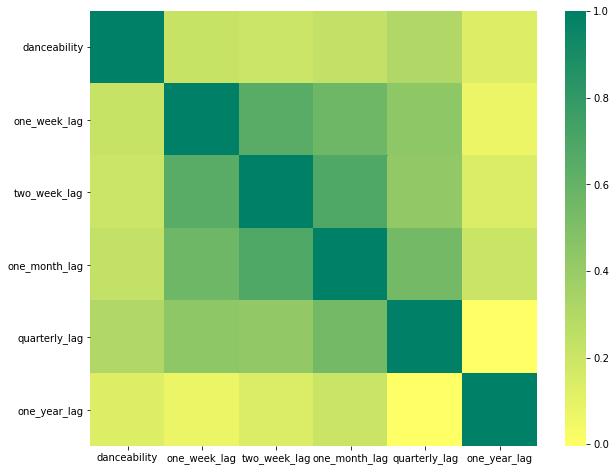

In [97]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(lag_df_dance.corr(), cmap='summer_r') ;

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_pacf(df['co2'], lags=20);

In [104]:
rw_italy_17_19[rw_italy_17_19['danceability'].isnull()]

,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
date,,,,,,,,,,,,,,,
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rw_italy_17_19

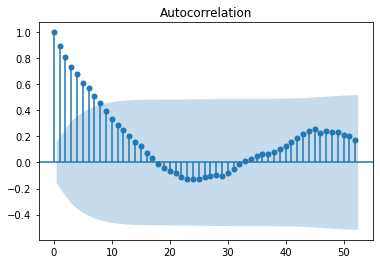

In [106]:
plot_acf(rw_italy_17_19['danceability'].dropna(), lags=52) ;

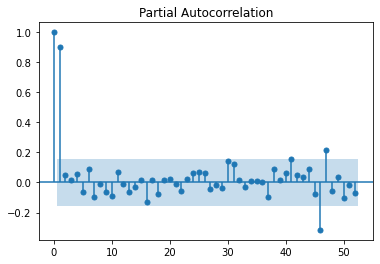

In [108]:
plot_pacf(rw_italy_17_19['danceability'].dropna(), lags=52) ;

In [110]:
sns.heatmap(rw_italy_17_19.corr())

,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Streams,NaN,1.000000,0.588749,-0.610352,0.045631,-0.586934,-0.093789,0.856929,0.581395,-0.472489,0.697995,-0.108060,0.446277,-0.912973,0.008255
danceability,NaN,0.588749,1.000000,-0.146250,0.223910,-0.052400,-0.480334,0.592952,-0.100976,-0.672037,0.415774,0.133795,0.339771,-0.655164,0.330497
energy,NaN,-0.610352,-0.146250,1.000000,-0.052296,0.903344,-0.148182,-0.618897,-0.751658,0.138850,-0.362849,0.450112,-0.335738,0.612908,0.279133
key,NaN,0.045631,0.223910,-0.052296,1.000000,0.026161,-0.436724,-0.005220,-0.173336,-0.383618,0.050980,-0.286542,0.066736,-0.102313,-0.261405
loudness,NaN,-0.586934,-0.052400,0.903344,0.026161,1.000000,-0.183218,-0.647571,-0.685868,0.099906,-0.246216,0.248229,-0.191126,0.621792,0.271017
mode,NaN,-0.093789,-0.480334,-0.148182,-0.436724,-0.183218,1.000000,-0.089000,0.282013,0.404018,-0.014652,-0.119653,-0.039852,0.114405,-0.351349
speechiness,NaN,0.856929,0.592952,-0.618897,-0.005220,-0.647571,-0.089000,1.000000,0.527186,-0.428650,0.615452,-0.108718,0.422924,-0.854756,0.097315
acousticness,NaN,0.581395,-0.100976,-0.751658,-0.173336,-0.685868,0.282013,0.527186,1.000000,0.004542,0.525882,-0.298297,0.385707,-0.516133,-0.179227
instrumentalness,NaN,-0.472489,-0.672037,0.138850,-0.383618,0.099906,0.404018,-0.428650,0.004542,1.000000,-0.316228,-0.072539,-0.379139,0.547916,-0.041087


## Comparing Italy, Greece, Spain 2017-19

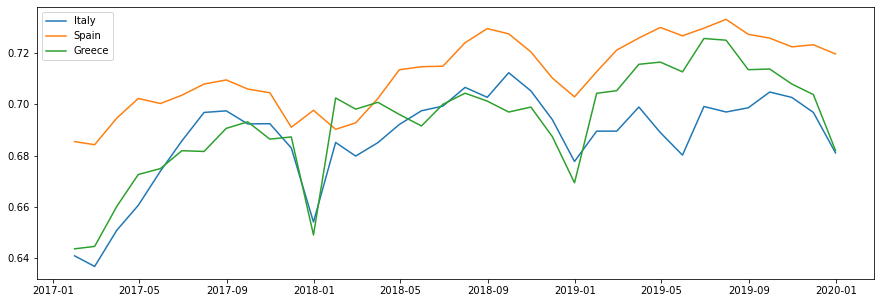

In [92]:
# fig, axs= plt.subplots(11,1, figsize=(12, 50))

# for i, features in enumerate(audio_features):
#     axs[i].plot(rm_italy_17_19[feature])

fig, axs= plt.subplots(1,1, figsize=(15,5))
# fig, ax = plt.plot(figsize=(10,5))
plt.plot(rm_italy_17_19['danceability'], label='Italy')
plt.plot(rm_italy_17_19['danceability'], label='Spain')
plt.plot(rm_greece_17_19['danceability'], label='Greece')

plt.legend()
# plt.set_title('Danceability')

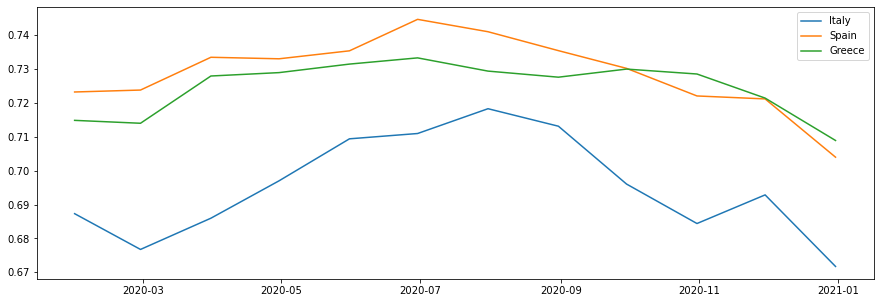

In [90]:
fig, axs= plt.subplots(1,1, figsize=(15,5))
# fig, ax = plt.plot(figsize=(10,5))
plt.plot(rm_italy_20['danceability'], label='Italy')
plt.plot(rm_spain_20['danceability'], label='Spain')
plt.plot(rm_greece_20['danceability'], label='Greece')

plt.legend()
# plt.set_title('Danceability')

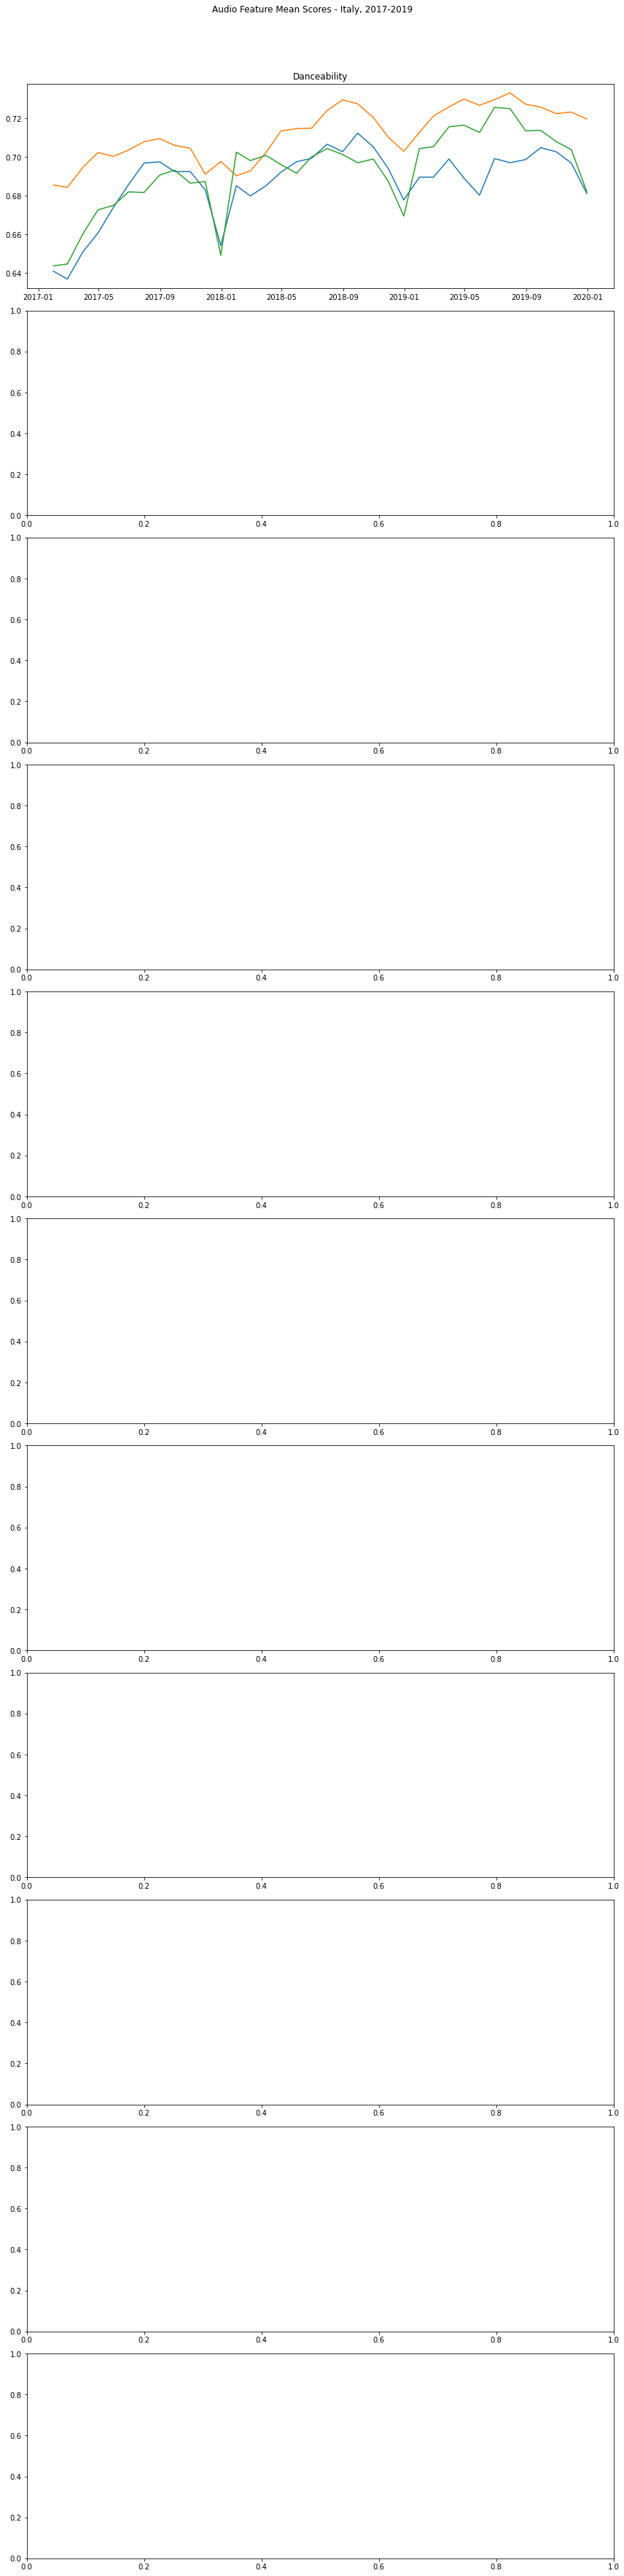

In [66]:
fig, axs= plt.subplots(11,1, figsize=(12, 50))

# for i, features in enumerate(audio_features):
#     axs[i].plot(rm_italy_17_19[feature])

# fig, axs= plt.subplots(11,1, figsize=(10,20))

axs[0].plot(rm_italy_17_19['danceability'])
axs[0].plot(rm_italy_17_19['danceability'])
axs[0].plot(rm_greece_17_19['danceability'])
axs[0].set_title('Danceability')
# axs[1].plot(rm_italy_17_19['energy'])
# axs[1].set_title('Energy')
# axs[2].plot(rm_italy_17_19['key'])
# axs[2].set_title('Key')
# axs[3].plot(rm_italy_17_19['loudness']) 
# axs[3].set_title('Loudness')
# axs[4].plot(rm_italy_17_19['mode'])
# axs[4].set_title('Mode')
# axs[5].plot(rm_italy_17_19['speechiness'])
# axs[5].set_title('Speechiness i.e. Has Spoken Words')
# axs[6].plot(rm_italy_17_19['acousticness'])
# axs[6].set_title('Acousticness')
# axs[7].plot(rm_italy_17_19['instrumentalness'])
# axs[7].set_title('Instrumentalness i.e. Contains No Vocals')
# axs[8].plot(rm_italy_17_19['liveness'])
# axs[8].set_title('Liveness i.e. Presence of Live Audience ')
# axs[9].plot(rm_italy_17_19['valence'])
# axs[9].set_title('Valence i.e. Positive Vibes')
# axs[10].plot(rm_italy_17_19['tempo'])
# axs[10].set_title('Tempo (BPM)')


fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Audio Feature Mean Scores - Italy, 2017-2019')
plt.show()